**Practical 8 a**

**a. Write a program to construct a Bayesian Network considering medical data.** 


**Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease 
Data Set.** 


**Name of the dataset :** Heart Disease Data Set

 https://drive.google.com/file/d/17vwRLAY8uR-6vWusM5prn08it-BEGp-f/view


Reference for Dataset : 

**Reference for practical:** 

https://www.vtupulse.com/machine-learning/bayesian-network-in-python-using-pgmpy/





Theory: 


A Bayesian network is a directed acyclic graph in which each edge corresponds to a conditional dependency, and each node corresponds to a unique random variable.


Bayesian network consists of two major parts: a directed acyclic graph and a set of conditional probability distributions


The directed acyclic graph is a set of random variables represented by nodes.

The conditional probability distribution of a node (random variable) is defined for every possible outcome of the preceding causal node(s).

For illustration, consider the following example. Suppose we attempt to turn on our computer, but the computer does not start (observation/evidence). 

We would like to know which of the possible causes of computer failure is more likely. 

In this simplified illustration, we assume only two possible causes of this misfortune: electricity failure and computer malfunction


The corresponding directed acyclic graph is depicted in below figure.


The goal is to calculate the posterior conditional probability distribution of each of the possible unobserved causes given the observed evidence, i.e. P [Cause | Evidence].

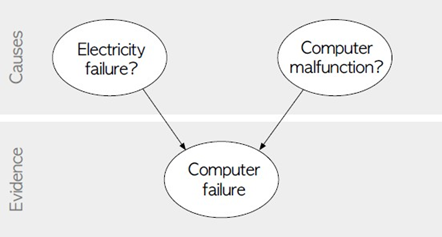

**Data Set:**

**Title: Heart Disease Databases**

The Cleveland database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 

In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 

The “Heartdisease” field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


Database: 0 1 2 3 4 Total

Cleveland: 164 55 36 35 13 303

**Attribute Information:**

**age**: age in years
**sex**: sex (1 = male; 0 = female)

**cp**: chest pain type
**Value 1**: typical angina
**Value 2**: atypical angina
**Value 3**: non-anginal pain
**Value 4**: asymptomatic

**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**chol**: serum cholestoral in mg/dl

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg**: resting electrocardiographic results

**Value 0**: normal

**Value 1:** having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**Value 2**: showing probable or definite left ventricular hypertrophy by Estes’ criteria

**thalach:** maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)

**oldpeak** = ST depression induced by exercise relative to rest
**slope:** the slope of the peak exercise ST segment

**Value 1:** upsloping

**Value 2:** flat

**Value 3:** downsloping

**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect


Heartdisease: It is integer valued from 0 (no presence) to 4.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [ ]:
heart = pd.read_csv('/content/heart.csv')

In [ ]:
heart

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [ ]:
heart.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
heart.tail()    

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.isnull().sum()

age             0
gender          0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

In [ ]:
heart.shape

(303, 14)

In [ ]:
del heart['ca']
del heart['thal']
del heart['slope']
del heart['oldpeak']


In [ ]:
heart.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,heartdisease
0,63,1,1,145,233,1,2,150,0,0
1,67,1,4,160,286,0,2,108,1,2
2,67,1,4,120,229,0,2,129,1,1
3,37,1,3,130,250,0,0,187,0,0
4,41,0,2,130,204,0,2,172,0,0


In [ ]:
heart.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'heartdisease'],
      dtype='object')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           303 non-null    int64
 1   gender        303 non-null    int64
 2   cp            303 non-null    int64
 3   trestbps      303 non-null    int64
 4   chol          303 non-null    int64
 5   fbs           303 non-null    int64
 6   restecg       303 non-null    int64
 7   thalach       303 non-null    int64
 8   exang         303 non-null    int64
 9   heartdisease  303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


In [ ]:
!pip install pgmpy

Given data the maximum likelihood estimate (MLE) for the parameter p is the value of p that maximizes the likelihood P(data |p).

That is, the MLE is the value of p for which the data is most likely.

100 P(55 heads|p) = ( 55 ) p55(1 − p)45.

We'll use the notation p for the MLE.

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

In [ ]:
heart.columns

In [ ]:
model = BayesianModel([('age','trestbps'),('age','fbs'),('gender','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])

In [ ]:
model.fit(heart,estimator=MaximumLikelihoodEstimator)

What Is A Directed Acyclic Graph?
A Directed Acyclic Graph is used to represent a Bayesian Network and like any other statistical graph, a DAG contains a set of nodes and links, where the links denote the relationship between the nodes.

Directed Acyclic Graphs - Bayesian Networks

The nodes here represent random variables and the edges define the relationship between these variables. But what do these graphs model? What output can you get from a DAG?

A DAG models the uncertainty of an event occurring based on the Conditional Probability Distribution (CDP) of each random variable. A Conditional Probability Table (CPT) is used to represent the CPD of each variable in the network.

Before we move any further, let’s understand the basic math behind Bayesian Networks.

In [ ]:
print(model.get_cpds('age'))

+---------+------------+
| age(29) | 0.00330033 |
+---------+------------+
| age(34) | 0.00660066 |
+---------+------------+
| age(35) | 0.0132013  |
+---------+------------+
| age(37) | 0.00660066 |
+---------+------------+
| age(38) | 0.00660066 |
+---------+------------+
| age(39) | 0.0132013  |
+---------+------------+
| age(40) | 0.00990099 |
+---------+------------+
| age(41) | 0.0330033  |
+---------+------------+
| age(42) | 0.0264026  |
+---------+------------+
| age(43) | 0.0264026  |
+---------+------------+
| age(44) | 0.0363036  |
+---------+------------+
| age(45) | 0.0264026  |
+---------+------------+
| age(46) | 0.0231023  |
+---------+------------+
| age(47) | 0.0165017  |
+---------+------------+
| age(48) | 0.0231023  |
+---------+------------+
| age(49) | 0.0165017  |
+---------+------------+
| age(50) | 0.0231023  |
+---------+------------+
| age(51) | 0.039604   |
+---------+------------+
| age(52) | 0.0429043  |
+---------+------------+
| age(53) | 0.0264026  |


In [ ]:
print(model.get_cpds('gender'))

+-----------+----------+
| gender(0) | 0.320132 |
+-----------+----------+
| gender(1) | 0.679868 |
+-----------+----------+


In [ ]:
print(model.get_cpds('fbs'))

+--------+---------+---------+-----+---------+---------+---------+
| age    | age(29) | age(34) | ... | age(74) | age(76) | age(77) |
+--------+---------+---------+-----+---------+---------+---------+
| fbs(0) | 1.0     | 1.0     | ... | 1.0     | 1.0     | 1.0     |
+--------+---------+---------+-----+---------+---------+---------+
| fbs(1) | 0.0     | 0.0     | ... | 0.0     | 0.0     | 0.0     |
+--------+---------+---------+-----+---------+---------+---------+
